In [4]:
import sys, os
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pydub
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
import torch.nn as nn
from datasets import *
from loading import load_model
#import torchaudio
#from torchaudio import transforms
import h5py as hf

In [2]:
#root = 'trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-010850/'#checkpoint_20.pth.tar'
root = 'trained_nets/gan-mel-gain5-1000-jstep5-jclip01-norm_18-12-06-041401/'

name = 'checkpoint_{}.pth.tar'.format(50)
name = 'best.pth.tar'
path = os.path.join(root, name)

In [3]:
model = load_model(path)
ckpt = torch.load(path)
print(model)
ckpt.keys()

Traceback (most recent call last):
  File "/home/fleeb/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-042adc184249>", line 1, in <module>
    model = load_model(path)
  File "/home/fleeb/workspace/marl/foundation/carotid/loading.py", line 17, in load_model
    checkpoint = torch.load(path)
  File "/home/fleeb/anaconda3/lib/python3.6/site-packages/torch/serialization.py", line 358, in load
    return _load(f, map_location, pickle_module)
  File "/home/fleeb/anaconda3/lib/python3.6/site-packages/torch/serialization.py", line 542, in _load
    result = unpickler.load()
  File "/home/fleeb/anaconda3/lib/python3.6/site-packages/torch/serialization.py", line 508, in persistent_load
    data_type(size), location)
  File "/home/fleeb/anaconda3/lib/python3.6/site-packages/torch/serialization.py", line 104, in default_restore_location
    result = fn(storage, location)


KeyboardInterrupt: 

In [ ]:
weights = model[0].conv[0].weight.clone().detach().cpu()
weights.size()

In [21]:
i = 0
N = 10

<IPython.core.display.Javascript object>


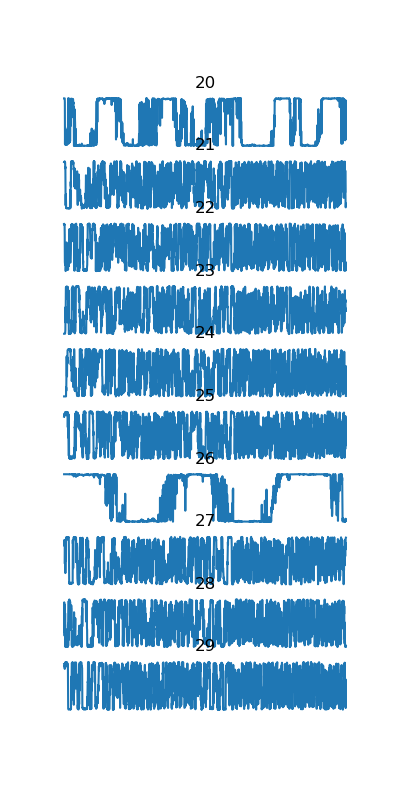

In [26]:
fig, axes = plt.subplots(N, figsize=(4,8))
for j, (ax, w) in enumerate(zip(axes.flat, weights[i:].squeeze())):
    ax.plot(w.numpy())
    ax.set_title(str(i+j))
    ax.axis('off')
#fig.tight_layout()
i += N

In [29]:
good_ones = [49, 68, 60,
             78, 85, 26,
             124, 20, 12,
             #21,  69, 52,
            ]
M = min(12, len(good_ones)) #len(good_ones) - 1

<IPython.core.display.Javascript object>


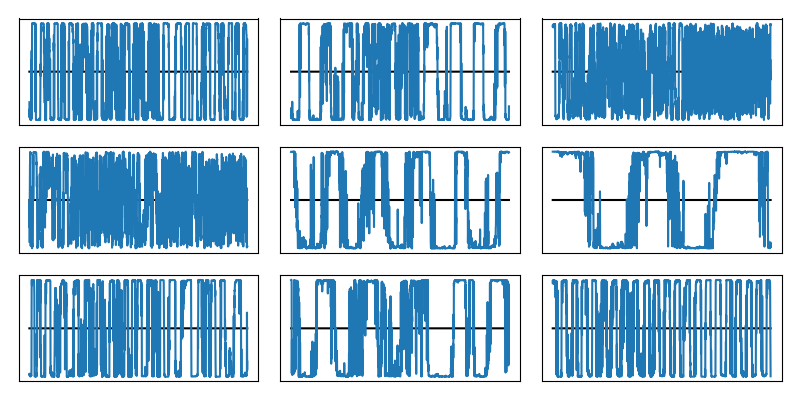

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(8,4))
for j, (ax, w) in enumerate(zip(axes.flat, weights[good_ones].squeeze())):
    ax.plot(np.zeros(w.shape[0]), c='k')
    ax.plot(w.numpy())
    
    #ax.set_title(str(i+j))
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.axis('off')
fig.tight_layout()

In [31]:
# fig.savefig('results/gan-weights.png')
# fig.savefig('results/gan-weights.pdf')

In [8]:
def parameter_count(module):
    s = sum([np.prod(d.size()) for d in module.parameters()])
    return s

In [37]:
root = 'trained_nets/'

In [38]:
model_paths = [p for p in os.listdir(root) if 'gan' in p]
names = [p[:p.find('_')] for p in model_paths]
model_paths = [os.path.join(root, p) for p in model_paths]
names

['gan-mel-gain5-1000-jstep5-jclip01-nobias',
 'gan-mel-3000-jstep5-jclip01',
 'gan-mel-gain5-3000-jstep5-jclip01',
 'gan-jstep2-jclip01',
 'gan-mel-gain5-1000-jstep5-jclip01-norm',
 'gan-mel-gain6-1000-jstep5-jclip01',
 'gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm',
 'gan-jmel-gain5-1000-jstep3-jclip03-genlayers2-norm-lr4',
 'gan-mel-1000-jstep2-jclip01',
 'gan-3sec-rmsprop',
 'gan-jmel-gain5-3000-jstep5-jclip01-genlayers3',
 'gan-mel-gain5-3000-jstep5-jclip01-norm',
 'gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4',
 'gan-jmel-gain5-3000-jstep5-jclip01-genlayers2-norm',
 'gan-jmel-gain5-1000-jstep5-jclip01-genlayers3-norm',
 'gan-3sec-clip04-rmsprop',
 'gan-jmel-gain5-1000-jstep5-jclip01-genlayers4',
 'gan-jmel-gain5-2000-jstep5-jclip03-genlayers2-norm-lr4',
 'gan-jmel-gain5-1000-jstep5-jclip01-genlayers4-norm-lstm',
 'test-gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4-lstm',
 'gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-lr4',
 'gan-jmel-gain5-1000-jstep5-jcl

In [40]:
for name, path in zip(names, model_paths):
    try:
        model = load_model(path)
    except:
        continue
    num = parameter_count(model)
    print('{} : {}'.format(name, num))

Loaded trained_nets/gan-mel-gain5-1000-jstep5-jclip01-nobias_18-12-06-155249/best.pth.tar
Norm: False
Saved params loaded
gan-mel-gain5-1000-jstep5-jclip01-nobias : 2981122
Loaded trained_nets/gan-mel-3000-jstep5-jclip01_18-12-05-225018/best.pth.tar
Norm: False
Saved params loaded
gan-mel-3000-jstep5-jclip01 : 2981122
Loaded trained_nets/gan-jstep2-jclip01_18-12-05-033729/best.pth.tar
Saved params loaded
gan-jstep2-jclip01 : 1662621
Loaded trained_nets/gan-mel-gain5-1000-jstep5-jclip01-norm_18-12-06-041401/best.pth.tar
Norm: True
Saved params loaded
gan-mel-gain5-1000-jstep5-jclip01-norm : 2981122
Loaded trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm_18-12-07-010453/best.pth.tar
Norm: True
Saved params loaded
gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm : 3352833
Loaded trained_nets/gan-jmel-gain5-1000-jstep3-jclip03-genlayers2-norm-lr4_18-12-07-100826/best.pth.tar
Norm: True
Saved params loaded
gan-jmel-gain5-1000-jstep3-jclip03-genlayers2-norm-lr4 : 2514689
Loa

In [235]:
#root = 'trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4-cls_18-12-07-160719/'
root = 'trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/'
#root = 'trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/'
#root = 'trained_nets/gan-jmel-gain5-3000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102437'
name = 'checkpoint_{}.pth.tar'.format(8)
#name = 'best.pth.tar'
path = os.path.join(root, name)

In [236]:
emodel = load_model(path)
ckpt = torch.load(path)
print(model)
ckpt.keys()

Loaded trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/checkpoint_8.pth.tar
Norm: True
Saved params loaded
ModuleList(
  (0): MEL_Discriminator(
    (rec): RecNet(
      (rec): GRU(384, 256, num_layers=2, batch_first=True)
      (out_layer): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (1): MEL_Generator(
    (inventor): RecNet(
      (rec): GRU(256, 384, num_layers=2, batch_first=True)
    )
    (spec): MEL_Spectrogram()
  )
)


dict_keys(['epoch', 'args', 'best_loss', 'best_epoch', 'train_stats', 'train_data', 'test_data', 'model_state', 'j_optim_state', 'g_optim_state'])

In [237]:
name = 'checkpoint_{}.pth.tar'.format(48)
#name = 'best.pth.tar'
path = os.path.join(root, name)
lmodel = load_model(path)
ckpt = torch.load(path)
print(lmodel)
ckpt.keys()

Loaded trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/checkpoint_48.pth.tar
Norm: True
Saved params loaded
ModuleList(
  (0): MEL_Discriminator(
    (rec): RecNet(
      (rec): GRU(384, 256, num_layers=2, batch_first=True)
      (out_layer): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (1): MEL_Generator(
    (inventor): RecNet(
      (rec): GRU(256, 384, num_layers=2, batch_first=True)
    )
    (spec): MEL_Spectrogram()
  )
)


dict_keys(['epoch', 'args', 'best_loss', 'best_epoch', 'train_stats', 'train_data', 'test_data', 'model_state', 'j_optim_state', 'g_optim_state'])

In [256]:
model = lmodel
#model = emodel

In [257]:
parameter_count(model)

2514689

In [258]:
gen = model[1]
print(gen, gen.ret_mel)

MEL_Generator(
  (inventor): RecNet(
    (rec): GRU(256, 384, num_layers=2, batch_first=True)
  )
  (spec): MEL_Spectrogram()
) True


In [259]:
gen.ret_mel = False

In [260]:
gen.seq_len

44100

In [261]:
true_data = ckpt['train_data']
len(true_data), true_data.seq_len

(194993, 882000)

In [262]:
seq_len = 20000 # ms

In [272]:
true_data.seq_len = seq_len * 44100 // 1000
true = true_data[170000][0] # 12300 170000
true2 = true_data[12300][0]
true.shape

(882000,)

In [273]:
audio = gen(num=1, seq_len=seq_len)
audio.size(), audio.size(-1) / 44100

(torch.Size([1, 1, 882000]), 20.0)

In [ ]:
mel = gen.mel.t()
mel.size()

In [274]:
gen.mel.size(), gen.mel.max()

(torch.Size([1, 501, 128]),
 tensor(4.9925, device='cuda:0', grad_fn=<MaxBackward1>))

In [277]:
#pmel2 = gen.mel

<IPython.core.display.Javascript object>


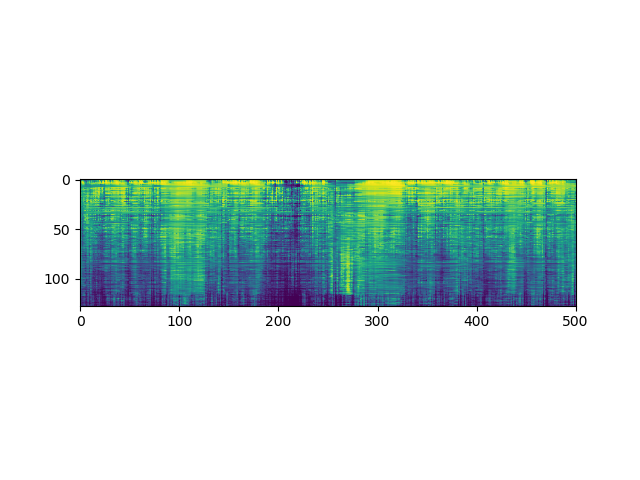

In [276]:
plt.figure()
plt.imshow(gen.mel[0].detach().cpu().numpy())

In [219]:
mel, phase = gen.spec(torch.from_numpy(true).unsqueeze(0).cuda().float(), ret_phase=True)
#tmel2 = mel
mel.size(), phase.size()

(torch.Size([1, 128, 500]), torch.Size([1, 128, 500]))

<IPython.core.display.Javascript object>


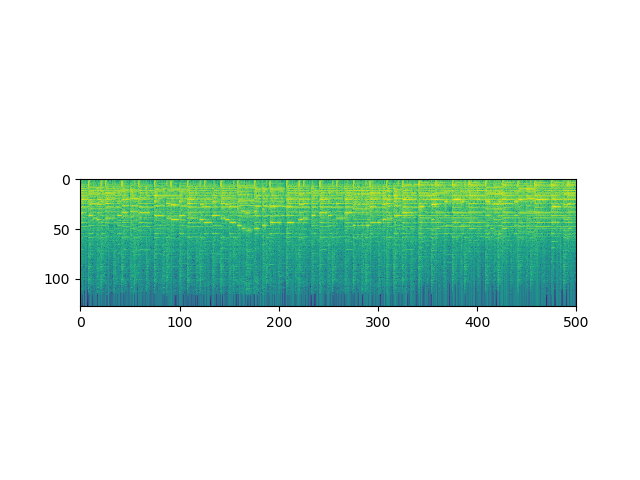

In [220]:
plt.figure()
plt.imshow(mel[0].detach().cpu().numpy())

In [222]:
tmel1.size(), tmel2.size()

(torch.Size([1, 128, 500]), torch.Size([1, 128, 500]))

In [284]:
#pmel1, pmel2 = pmel1[0].t(), pmel2[0].t()
#tmel1, tmel2 = tmel1[0], tmel2[0]

In [285]:
imgs = [
    pmel1, pmel2,
    tmel1, tmel2,
]
titles = [
    'A', 'B', 'C', 'D',
]

<IPython.core.display.Javascript object>


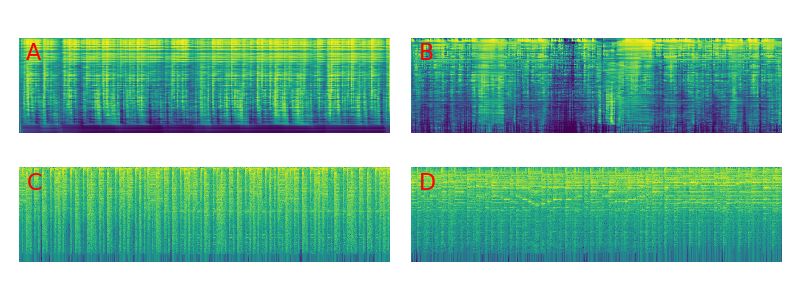

In [301]:
fig, axes = plt.subplots(2,2, figsize=(8,3))

for t, img, ax in zip(titles, imgs, axes.flat):
    
    plt.sca(ax)
    plt.text(10,30,s=t, color='r', size=16)
    #plt.title(t)
    plt.imshow(img.detach().cpu().numpy())
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
fig.tight_layout()


In [302]:
#fig.savefig('results/specs.png')
#fig.savefig('results/specs.pdf')

In [17]:
#plt.figure()
#plt.imshow(gen.phase[0].detach().cpu().numpy())

<IPython.core.display.Javascript object>


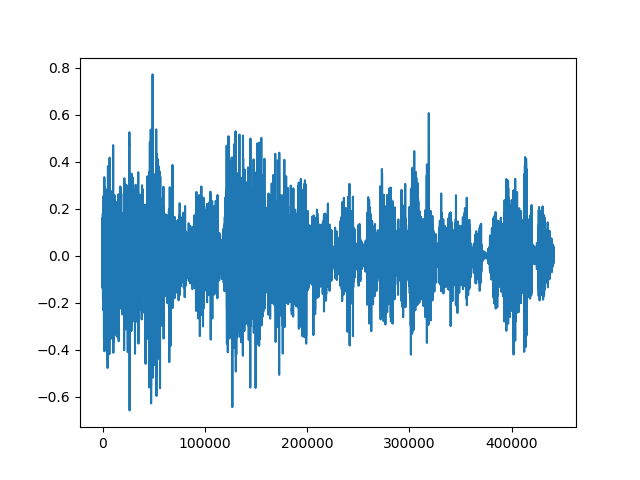

In [78]:
plt.figure()
plt.plot(audio[0,0].cpu().detach().numpy())

<IPython.core.display.Javascript object>


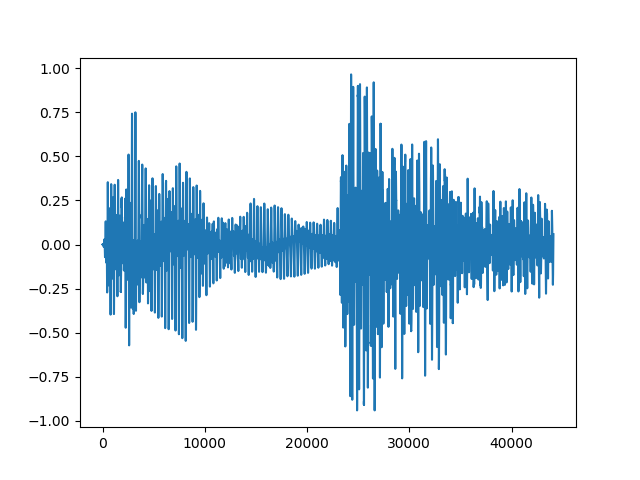

In [19]:
plt.figure()
plt.plot(true)

In [51]:
tseg = samples2audio(true.astype(np.float32))
tseg.duration_seconds, tseg.rms, tseg.dBFS

(3.0, 6811, -13.644781093542182)

In [79]:
seg = samples2audio(audio[0,0].detach().cpu().numpy())
seg.duration_seconds

10.0

In [80]:
#ref = np.sin(np.linspace(0,100*2*np.pi, num=44100))

In [81]:
seg.rms, seg.dBFS

(3076, -20.54927207660649)

In [82]:
s2 = pydub.effects.normalize(seg)
s2.rms, s2.dBFS

(3937, -18.405690403389766)

In [83]:
#tseg.export('control.mp3', format='mp3')
#seg.export('gen8.mp3', format='mp3')
#s2.export('gen8-norm.mp3', format='mp3')

<_io.BufferedRandom name='gen8-norm.mp3'>

In [46]:
x = s2.apply_gain_stereo(0)
x.rms, x.dBFS

(17306, -5.5450647116140805)

In [48]:
x = x.apply_gain_stereo(-3)
x.rms, x.dBFS

(14039, -7.362275218459605)

In [105]:
true = ckpt['train_data'][2][0]
true.shape

(44100,)

In [118]:
x = audio[0,0].detach().cpu().numpy().copy()#*2
#x = true.copy() #ref.copy()#/2
x.shape

(220500,)

In [119]:
rms = np.sqrt((x**2).mean())
rms

1.0098447

In [121]:
20*np.log10(rms)

0.0850914791226387

In [120]:
np.sqrt((x**2).mean()) * 2**15

33090.58984375

In [109]:
s = samples2audio(x.astype(np.float32))
s.rms, s.dBFS

(4993, -16.34176737809216)

In [110]:
s.dBFS

-16.34176737809216

In [111]:
#tseg.apply_gain(-14 - (-13.535)).dBFS

In [112]:
s.max

25082

In [113]:
from pydub.utils import db_to_float, ratio_to_db

In [114]:
db_to_float(-3)

0.7079457843841379

In [115]:
(x==0).sum()

6

In [116]:
20*np.log10(rms)

-16.340313441135358

In [117]:
10*np.log10(np.square(x+1e-10))

-16.340313441133492